# keras进阶-标准化

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 手写数字 mnist, cifar10
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train[0]

5

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

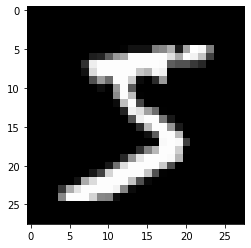

In [7]:
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
y_train.dtype

dtype('uint8')

标准化

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# 对数据做处理
x_train = x_train.reshape(-1,784)/255
x_test = x_test.reshape(-1,784)/255

# 对x_train,x_test 做标准化处理
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# tf.one_hot()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

一层网络叫做一层Dense

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
# 定义神经网络
model = tf.keras.Sequential()
# 第一层要多写一个参数，叫做输入数据的维度
# 输入维度有两种写法 第一种是input_shape,必须是一个元组，不要写样本个数，只需要写特征的维度即可
# imput_dim,不需要写元组，直接指定具体的数字即可
model.add(Dense(64,activation='relu',input_shape = (784,)))
# model.add(Dense(64,activation='relu',input_dim = 784))
# 除了第一层需要传输入数据的维度, 其他层不需要, keras会自动的帮我们计算维度.
model.add(Dense(64, activation='relu'))
# 输出层的激活, 二分类是sigmoid, 多分类的话是softmax
model.add(Dense(10, activation='softmax'))

In [14]:
# 配置网络
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
y_train.shape

(60000, 10)

In [16]:
# 训练网络
model.fit(x_train_scaled,
       y_train,batch_size=64,
       epochs=20,
       validation_data= (x_test_scaled, y_test), )

Epoch 1/20
938/938 [==============================] - 2s 1ms/step - loss: 0.2771 - accuracy: 0.9186 - val_loss: 0.1600 - val_accuracy: 0.9539
Epoch 2/20
938/938 [==============================] - 1s 1ms/step - loss: 0.1195 - accuracy: 0.9653 - val_loss: 0.1263 - val_accuracy: 0.9642
Epoch 3/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.1247 - val_accuracy: 0.9670
Epoch 4/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.1259 - val_accuracy: 0.9675
Epoch 5/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.1146 - val_accuracy: 0.9705
Epoch 6/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0389 - accuracy: 0.9876 - val_loss: 0.1363 - val_accuracy: 0.9675
Epoch 7/20
938/938 [==============================] - 1s 1ms/step - loss: 0.0329 - accuracy: 0.9887 - val_loss: 0.1392 - val_accuracy: 0.9690
Epoch 

In [17]:
# 查看网络参数量
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
784 * 64 + 64 

50240

In [19]:
64 * 64 + 64

4160

In [20]:
64*10 + 10

650

In [21]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 820us/step - loss: 0.2415 - accuracy: 0.9692


[0.24153707921504974, 0.9692000150680542]

In [ ]:
# 保存模型 HDF5 分层的数据结构.
#model.save('./model.h5')
# 加载
#l2.evaluate(x_test, y_test)
# 预测
#model.predict(x_test, ).shape

# keras进阶-正则化(L1, L2)

In [ ]:
# 定义神经网络.
model = tf.keras.Sequential()
# 第一层要多写一个参数, 叫做输入数据的维度. 
# 输入维度有两种写法, 第一种是input_shape, 必须是一个元组, 不要写样本个数, 只需要写特征的维度即可.
# input_dim, 不需要写元组, 直接指定具体的数字即可
model.add(Dense(64, activation='relu', kernel_regularizer='l1_l2', input_shape=(784, )))
# model.add(Dense(64, activation='relu', input_dim=784))
# 出了第一层需要传输入数据的维度, 其他层不需要, keras会自动的帮我们计算维度.
model.add(Dense(64, activation='relu', kernel_regularizer='l1_l2'))
# 输出层的激活, 二分类是sigmoid, 多分类的话是softmax
model.add(Dense(10, activation='softmax'))

In [ ]:
# 配置网络
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 训练网络
model.fit(x_train_scaled, y_train, batch_size=64, epochs=20, validation_data=(x_test_scaled, y_test), )

In [ ]:
# 查看网络参数量
model.summary()

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
# 预测
model.predict(x_test, ).shape

# keras进阶-正则化(dropout)

In [22]:
from tensorflow.keras.layers import Dense, Dropout, AlphaDropout

In [ ]:
# 定义神经网络.
model = tf.keras.Sequential()
# 第一层要多写一个参数, 叫做输入数据的维度. 
# 输入维度有两种写法, 第一种是input_shape, 必须是一个元组, 不要写样本个数, 只需要写特征的维度即可.
# input_dim, 不需要写元组, 直接指定具体的数字即可
model.add(Dense(512, activation='relu', input_shape=(784, )))
# model.add(Dropout(0.2))
# 1. 保持方差和均值不变, 2. 归一化性质不变.
model.add(AlphaDropout(0.2))
# model.add(Dense(64, activation='relu', input_dim=784))
# 出了第一层需要传输入数据的维度, 其他层不需要, keras会自动的帮我们计算维度.
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(AlphaDropout(0.2))
# 输出层的激活, 二分类是sigmoid, 多分类的话是softmax
model.add(Dense(10, activation='softmax'))

In [ ]:
# 配置网络
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 训练网络
model.fit(x_train_scaled, y_train, batch_size=64, epochs=20, validation_data=(x_test_scaled, y_test), )

In [ ]:
# 查看网络参数量
model.summary()

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
# 预测
model.predict(x_test, ).shape

# keras进阶-标准化-非独热编码

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 对数据做处理
x_train = x_train / 255.0
x_test = x_test / 255.0

# 对x_train, x_test做标准化处理
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# # tf.one_hot()
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [23]:
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# 定义神经网络.
model = tf.keras.Sequential()
# 第一层要多写一个参数, 叫做输入数据的维度. 
# 输入维度有两种写法, 第一种是input_shape, 必须是一个元组, 不要写样本个数, 只需要写特征的维度即可.
# input_dim, 不需要写元组, 直接指定具体的数字即可
# Flatten 即reshape, 展平
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu', input_dim=784))
# 出了第一层需要传输入数据的维度, 其他层不需要, keras会自动的帮我们计算维度.
model.add(Dense(64, activation='relu'))
# 输出层的激活, 二分类是sigmoid, 多分类的话是softmax
model.add(Dense(10, activation='softmax'))

In [ ]:
# 配置网络
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 训练网络
model.fit(x_train_scaled, y_train, batch_size=64, epochs=5, validation_data=(x_test_scaled, y_test), )

In [ ]:
# 查看网络参数量
model.summary()

In [ ]:
model2.evaluate(x_test, y_test)

In [ ]:
# 预测
model.predict(x_test, ).shape

# keras进阶-selu

In [24]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

In [25]:
# 定义神经网络.
model = tf.keras.Sequential()

# selu : scaled, relu -> elu -> selu
model.add(Dense(64, activation='selu', input_shape=(784, )))

model.add(Dense(64, activation='selu'))

model.add(Dense(10, activation='softmax'))

In [26]:
# 配置网络
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# 训练网络
model.fit(x_train_scaled, y_train, batch_size=64, epochs=5, validation_data=(x_test_scaled, y_test), )

Epoch 1/5
938/938 [==============================] - 1s 1ms/step - loss: 0.2970 - accuracy: 0.9146 - val_loss: 0.1735 - val_accuracy: 0.9501
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.1345 - accuracy: 0.9586 - val_loss: 0.1254 - val_accuracy: 0.9631
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0908 - accuracy: 0.9717 - val_loss: 0.1263 - val_accuracy: 0.9658
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0692 - accuracy: 0.9783 - val_loss: 0.1244 - val_accuracy: 0.9663
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0542 - accuracy: 0.9832 - val_loss: 0.1243 - val_accuracy: 0.9687


In [28]:
# 查看网络参数量
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 799us/step - loss: 0.1243 - accuracy: 0.9687


[0.12427050620317459, 0.9686999917030334]

In [30]:
# 预测
model.predict(x_test, ).shape

313/313 [==============================] - 0s 659us/step


(10000, 10)

In [31]:
model.predict(x_test)

313/313 [==============================] - 0s 708us/step


array([[1.0871819e-03, 3.2360142e-05, 5.1590701e-04, ..., 9.4347745e-01,
        1.5350661e-02, 5.6088914e-04],
       [4.5466232e-03, 3.1987036e-04, 7.7451611e-01, ..., 6.3743705e-06,
        9.4732434e-02, 1.2436208e-06],
       [2.4679783e-04, 1.3345158e-01, 1.5472421e-02, ..., 1.1390532e-02,
        8.1473750e-01, 1.7987052e-03],
       ...,
       [7.5523658e-06, 7.4948075e-06, 6.7530186e-07, ..., 3.1631289e-04,
        4.5368165e-01, 4.8060760e-02],
       [2.5562863e-03, 2.5091548e-03, 1.5678615e-04, ..., 2.0889334e-05,
        8.2332069e-01, 1.5273718e-04],
       [6.8663583e-05, 5.1802510e-07, 5.2304989e-05, ..., 7.4783053e-08,
        8.2855768e-05, 1.6312741e-04]], dtype=float32)

# keras进阶-BN层

In [32]:
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

In [ ]:
# 定义神经网络.
model = tf.keras.Sequential()
# 第一层要多写一个参数, 叫做输入数据的维度. 
# 输入维度有两种写法, 第一种是input_shape, 必须是一个元组, 不要写样本个数, 只需要写特征的维度即可.
# input_dim, 不需要写元组, 直接指定具体的数字即可
model.add(Dense(64, input_shape=(784, )))
#  先BN再激活
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# # 先激活, 再BN
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(64))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
# 输出层的激活, 二分类是sigmoid, 多分类的话是softmax
model.add(Dense(10, activation='softmax'))

In [ ]:
# 配置网络
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 训练网络
model.fit(x_train_scaled, y_train, batch_size=64, epochs=5, validation_data=(x_test_scaled, y_test), )

In [23]:
# 查看网络参数量
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [27]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9761


[0.10953254252672195, 0.9761000275611877]

In [32]:
# 预测
model.predict(x_test, ).shape

(10000, 10)

In [ ]:
# 以下为compile的常见写法:

#   ```python
#   # 多分类问题
#   model.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
#                 metrics=['accuracy'])
  
#   # 二分类问题
#   model.compile(optimizer='rmsprop',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])
  
#   # 均方误差回归问题
#   model.compile(optimizer='rmsprop',
#                 loss='mse')
  
#   # 自定义评估标准函数
#   import keras.backend as K
  
#   def mean_pred(y_true, y_pred):
#       return K.mean(y_pred)
  
#   model.compile(optimizer='rmsprop',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy', mean_pred])